In [1]:
import os
import helper
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Housing

Text(0.5, 1.0, 'Median Home Sales Prices by Year')

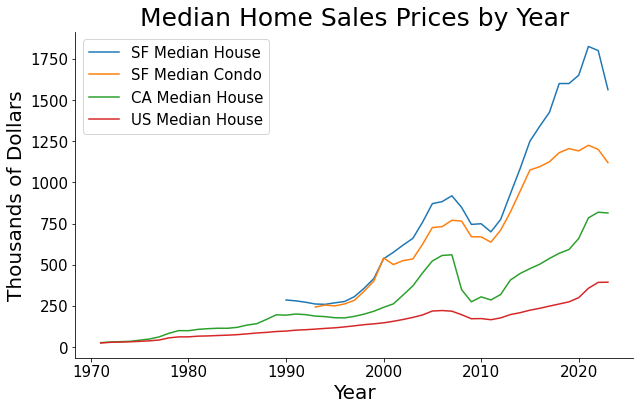

In [87]:
sf_ca_us_median_home_prices = pd.read_csv("../raw_data/government/sf_ca_us_median_home_prices.csv")

for column in sf_ca_us_median_home_prices.columns[1:]:
    sf_ca_us_median_home_prices[column] /= 1_000

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="San Francisco Median Existing House Price", data=sf_ca_us_median_home_prices, label="SF Median House")
sns.lineplot(x="Year", y="San Francisco Median Condo Price", data=sf_ca_us_median_home_prices, label="SF Median Condo")
sns.lineplot(x="Year", y="CA Median Existing House Price", data=sf_ca_us_median_home_prices, label="CA Median House")
sns.lineplot(x="Year", y="US Median Existing House Price", data=sf_ca_us_median_home_prices, label="US Median House")

plt.ylabel("Thousands of Dollars")
plt.title("Median Home Sales Prices by Year")

## Deaths of Despair
All data can be found from [CDC WONDER](https://wonder.cdc.gov/)
- Suicide data pulled from [here](https://www.cdc.gov/suicide/suicide-data-statistics.html)  
- Drug overdoses pulled from [here](https://injuryfacts.nsc.org/home-and-community/safety-topics/drugoverdoses/data-details/) (2023 estimate given from [NPR](https://www.npr.org/2023/12/28/1220881380/overdose-fentanyl-drugs-addiction))

In [2]:
suicides = pd.read_csv("../raw_data/individual/deaths_of_despair/suicide.txt")
drug_overdoses = pd.read_csv("../raw_data/individual/deaths_of_despair/drug_overdoses.txt")
alcohol_deaths = pd.read_csv("../raw_data/individual/deaths_of_despair/alcohol_deaths.txt")

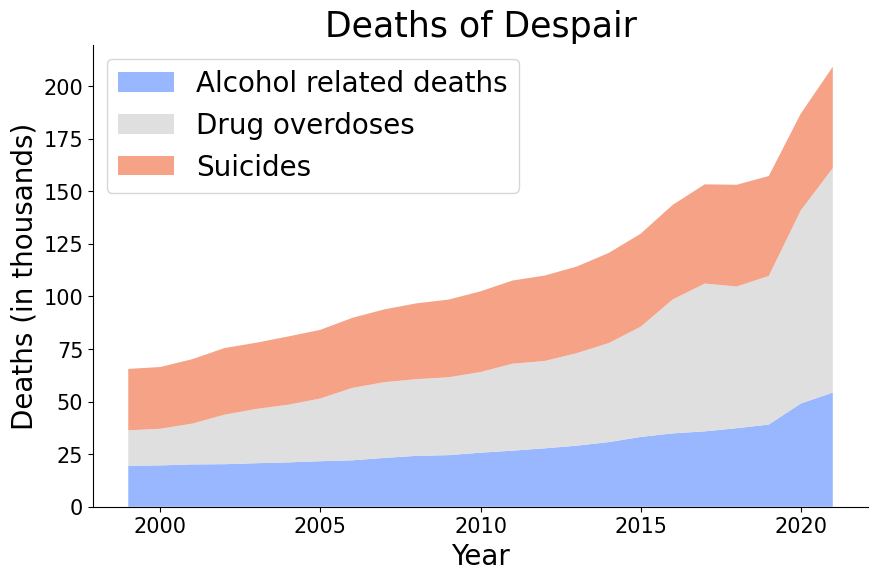

In [3]:
plt.stackplot(
    suicides.Year.values, 
    [
        alcohol_deaths["Alcohol related deaths"].values / 1_000, 
        drug_overdoses["Drug overdoses"].values / 1_000, 
        suicides["Suicides"].values / 1_000
    ], 
    labels=["Alcohol related deaths", "Drug overdoses", "Suicides"],
    alpha=0.9,
    colors=sns.color_palette("coolwarm", 3)
)
plt.legend(loc="upper left", fontsize=20)
plt.title("Deaths of Despair", fontsize=25)
plt.xlabel("Year")
plt.ylabel("Deaths (in thousands)");

plt.savefig("../images/deaths_of_despair.png")

## Education

### Degrees
Raw data pulled from [here](https://nces.ed.gov/programs/digest/d22/tables/dt22_318.20.asp)

In [4]:
degrees = pd.read_csv("../raw_data/individual/education/bachelors.txt")

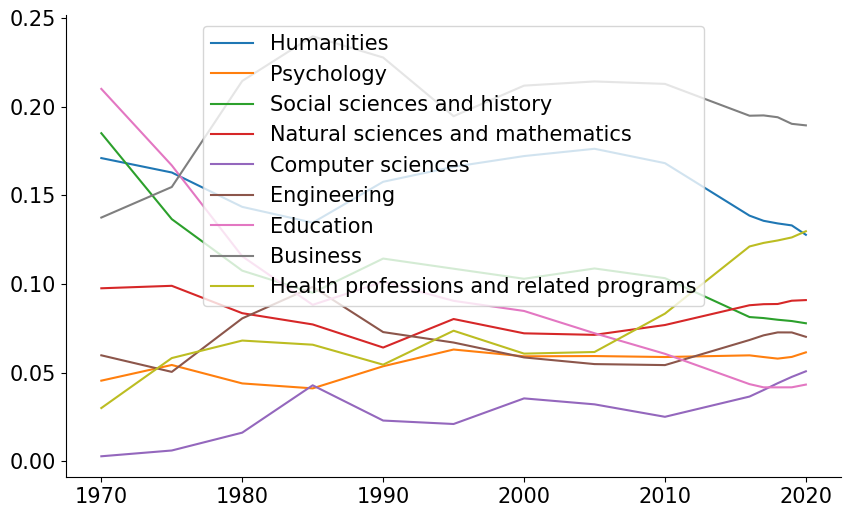

In [5]:
for name in degrees.columns[2:-1]:
    percent = degrees[name].values / degrees["Total degrees"].values
    plt.plot(degrees.Year.values, percent, label=name)

plt.legend()

In [6]:
degrees = pd.read_csv("../raw_data/individual/education/masters.txt")

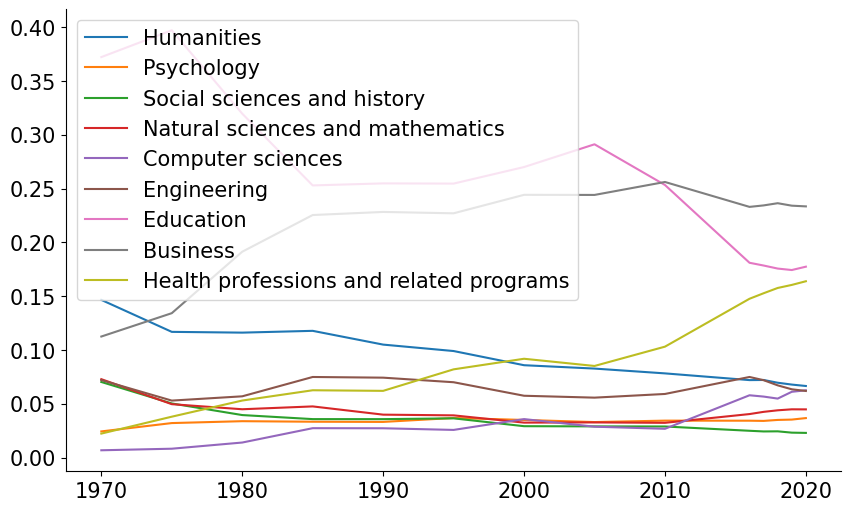

In [7]:
for name in degrees.columns[2:-1]:
    percent = degrees[name].values / degrees["Total degrees"].values
    plt.plot(degrees.Year.values, percent, label=name)

plt.legend()

In [8]:
degrees = pd.read_csv("../raw_data/individual/education/doctorates.txt")

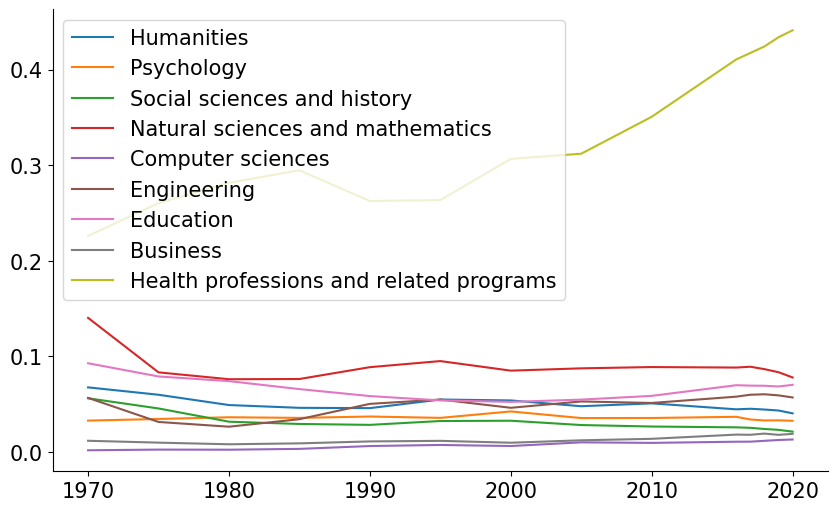

In [9]:
for name in degrees.columns[2:-1]:
    percent = degrees[name].values / degrees["Total degrees"].values
    plt.plot(degrees.Year.values, percent, label=name)

plt.legend()